# Benchmarking to Jorgenson 2022
- This notebook benchmarks approximatly to the R scripst of Jorgenson. We would not expect the answers to be the same, but the statistics should be broadly similar
- This notebook uses functions without normalization (e..g standard scalar), following Jorgenson
- The only other difference is we don't include NiO in the liquid or Cpx, or P2O5 in the Cpx. This is because the vast majority of the calibration dataset has no data for these elements
(3.8% for Ni in cpx, 5.6 % for P2O5 in Cpx, and 4.4 % for Ni in Liq)
- Very spare data can cause issues for regression trees (see Wieser et al. in review for most discussion), and our R2 values are better than the R version, so we feel this decision is jusified. 

In [24]:
import Thermobar as pt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Load in test dataset

In [25]:
out_test=pt.import_excel('Jorgenson_Test_dataset.xlsx',
                          sheet_name='Data_For_Corin_Thermobar')
out_test_input=out_test['my_input']
Cpx_test=out_test['Cpxs']
Liq_test=out_test['Liqs']

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:373: UserWarning: You've got a column heading with a lower case _liq, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Liq)
  w.warn("You've got a column heading with a lower case _liq, this is okay if this column is for your"


In [26]:
Cpx_test

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,50.30,0.42,5.19,8.88,0.08,16.00,18.90,0.24,0.0,0.0,0
1,52.00,0.34,4.40,8.87,0.23,16.40,17.50,0.22,0.0,0.0,1
2,50.80,0.35,4.84,9.12,0.20,17.00,17.40,0.27,0.0,0.0,2
3,52.20,0.27,4.61,6.43,0.14,16.60,19.50,0.25,0.0,0.0,3
4,49.40,0.42,6.29,7.40,0.18,16.00,20.00,0.30,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
142,50.09,0.79,1.74,20.02,0.60,11.79,15.46,0.24,0.0,0.0,142
143,50.19,1.00,2.96,9.96,0.42,13.65,21.55,0.27,0.0,0.0,143
144,49.50,1.20,3.96,10.45,0.43,12.63,21.31,0.34,0.0,0.0,144
145,49.44,0.97,2.18,15.87,0.61,12.19,17.63,0.25,0.0,0.0,145


In [28]:
P_Calc_CL=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationP="P_Petrelli2020_Cpx_Liq")

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
P_Calc_CL_J=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationP="P_Jorgenson2022_Cpx_Liq")

Im normalizing using the Jorgenson method, e.g. 100 total, 2dp


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Comparing Petrelli and Jorgenson

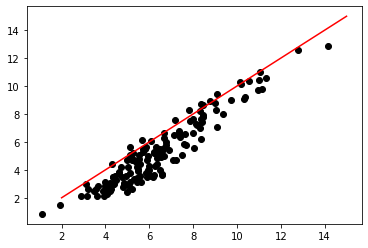

In [30]:
plt.plot(P_Calc_CL['P_kbar_calc'] ,P_Calc_CL_J['P_kbar_calc'], 'ok')
plt.plot([2, 15], [2, 15], '-r')

## Cpx-Liq barometer

Im normalizing using the Jorgenson method, e.g. 100 total, 2dp


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R2 Thermobar=0.42
RMSE Thermobar=2.30
Mean offset Thermobar=0.30
R2 R=0.30
RMSE R=2.81
Mean offset R=-0.64


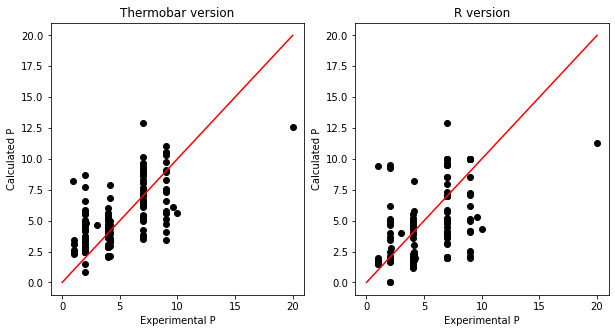

In [33]:
P_Calc_CL=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationP="P_Jorgenson2022_Cpx_Liq")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['P_kbar_x'], P_Calc_CL['P_kbar_calc'], 'ok')
ax1.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], P_Calc_CL['P_kbar_calc'])
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
print('Mean offset Thermobar='+str(Stats['Mean']))
ax1.set_xlabel('Experimental P')
ax1.set_ylabel('Calculated P')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['P_kbar_x'], out_test_input['P_values_liq'], 'ok')
ax2.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], out_test_input['P_values_liq'])
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))
print('Mean offset R='+str(Stats['Mean']))

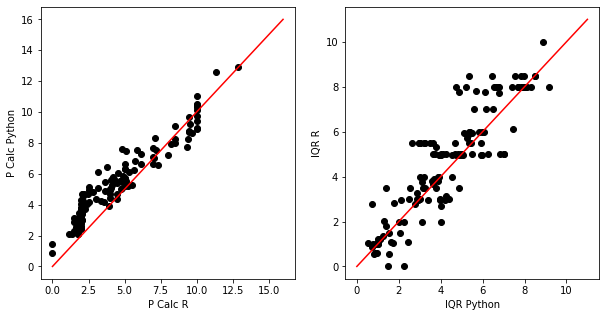

In [34]:
# Direclty comparing R and pyhton pressures, and IQR
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(out_test_input['P_values_liq'], P_Calc_CL['P_kbar_calc'], 'ok')
ax1.set_xlabel('P Calc R')
ax1.set_ylabel('P Calc Python')
ax1.plot([0, 16], [0, 16], '-r')

ax2.plot(out_test_input['P_IQR_liq'], P_Calc_CL['IQR_Trees'], 'ok')
ax2.set_ylabel('IQR R')
ax2.set_xlabel('IQR Python')
ax2.plot([0, 11], [0, 11], '-r')

## Cpx-Liq thermometer

Im normalizing using the Jorgenson method, e.g. 100 total, 2dp


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R2 Thermobar=0.82
RMSE Thermobar=49.34
Mean offset Thermobar=29.22
R2 R=0.80
RMSE R=47.69
Mean offset R=22.80


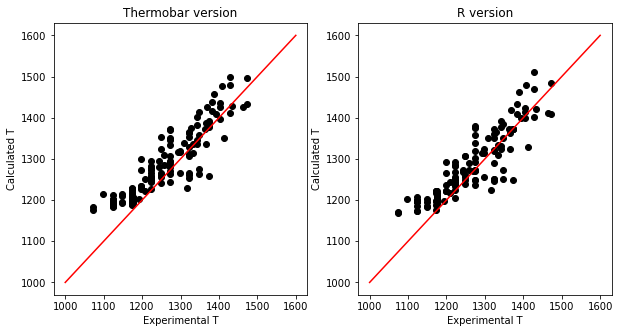

In [36]:
T_Calc_CL=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationT="T_Jorgenson2022_Cpx_Liq")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['T_K_x'], T_Calc_CL['T_K_calc'], 'ok')
ax1.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], T_Calc_CL['T_K_calc'])
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
print('Mean offset Thermobar='+str(Stats['Mean']))

ax1.set_xlabel('Experimental T')
ax1.set_ylabel('Calculated T')


ax2.set_title('R version')
ax2.set_xlabel('Experimental T')
ax2.set_ylabel('Calculated T')
ax2.plot(out_test_input['T_K_x'], out_test_input['T_values_liq']+273.15, 'ok')
ax2.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], out_test_input['T_values_liq']+273.15)
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))
print('Mean offset R='+str(Stats['Mean']))

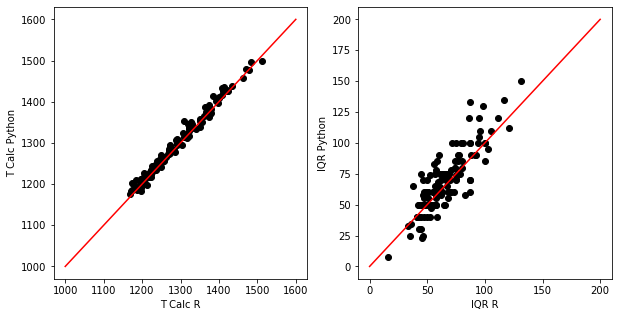

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(out_test_input['T_values_liq']+273.15, T_Calc_CL['T_K_calc'], 'ok')
ax1.set_xlabel('T Calc R')
ax1.set_ylabel('T Calc Python')
ax1.plot([1000, 1600], [1000, 1600], '-r')

ax2.plot(out_test_input['T_IQR_liq'], T_Calc_CL['IQR_Trees'], 'ok')
ax2.set_xlabel('IQR R')
ax2.set_ylabel('IQR Python')
ax2.plot([0, 200], [0, 200], '-r')

## Cpx only barometer

R2 Thermobar=0.40
RMSE Thermobar=2.38
Mean offset Thermobar=0.12
R2 R=0.33
RMSE R=2.74
Mean offset R=-0.68


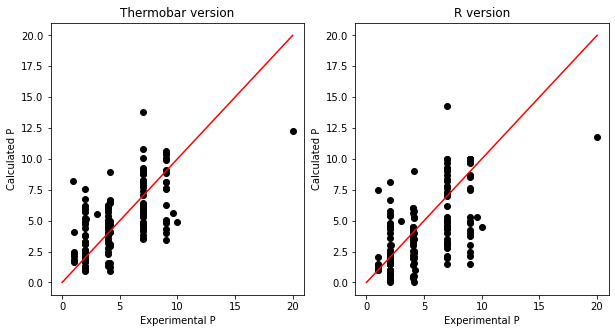

In [38]:
P_Calc_C=pt.calculate_cpx_only_press(cpx_comps=Cpx_test, 
equationP="P_Jorgenson2022_Cpx_only")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['P_kbar_x'], P_Calc_C['P_kbar_calc'], 'ok')
ax1.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], P_Calc_C['P_kbar_calc'])
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
print('Mean offset Thermobar='+str(Stats['Mean']))
ax1.set_xlabel('Experimental P')
ax1.set_ylabel('Calculated P')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['P_kbar_x'], out_test_input['P_values_noliq'], 'ok')
ax2.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], out_test_input['P_values_noliq'])
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))
print('Mean offset R='+str(Stats['Mean']))

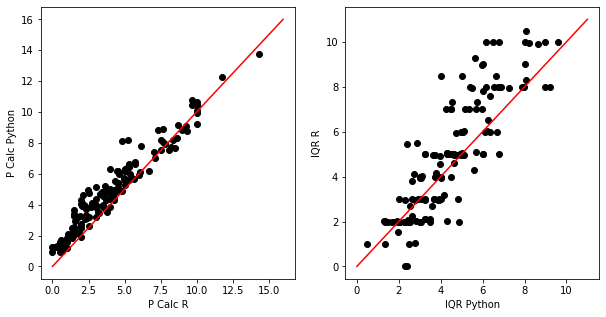

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(out_test_input['P_values_noliq'], P_Calc_C['P_kbar_calc'], 'ok')
ax1.set_xlabel('P Calc R')
ax1.set_ylabel('P Calc Python')
ax1.plot([0, 16], [0, 16], '-r')

ax2.plot(out_test_input['P_IQR_noliq'], P_Calc_C['IQR_Trees'], 'ok')
ax2.set_ylabel('IQR R')
ax2.set_xlabel('IQR Python')
ax2.plot([0, 11], [0, 11], '-r')

##  Cpx only thermometer

R2 Thermobar=0.48
RMSE Thermobar=119.24
Mean offset Thermobar=97.65
R2 R=0.42
RMSE R=112.28
Mean offset R=85.31


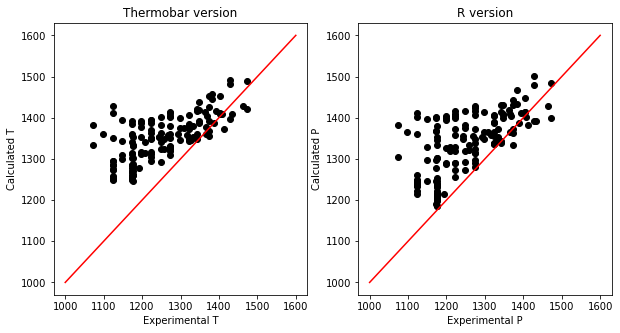

In [40]:
T_Calc_C=pt.calculate_cpx_only_temp(cpx_comps=Cpx_test,
equationT="T_Jorgenson2022_Cpx_only")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['T_K_x'], T_Calc_C['T_K_calc'], 'ok')
ax1.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], T_Calc_C['T_K_calc'])
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
print('Mean offset Thermobar='+str(Stats['Mean']))
ax1.set_xlabel('Experimental T')
ax1.set_ylabel('Calculated T')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['T_K_x'], out_test_input['T_values_noliq']+273.15, 'ok')
ax2.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], out_test_input['T_values_noliq']+273.15)
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))
print('Mean offset R='+str(Stats['Mean']))

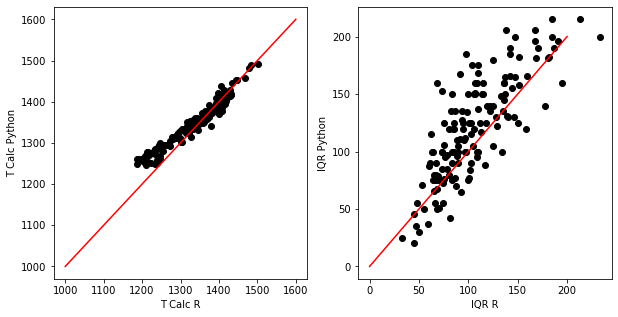

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(out_test_input['T_values_noliq']+273.15, T_Calc_C['T_K_calc'], 'ok')
ax1.set_xlabel('T Calc R')
ax1.set_ylabel('T Calc Python')
ax1.plot([1000, 1600], [1000, 1600], '-r')

ax2.plot(out_test_input['T_IQR_noliq'], T_Calc_C['IQR_Trees'], 'ok')
ax2.set_xlabel('IQR R')
ax2.set_ylabel('IQR Python')
ax2.plot([0, 200], [0, 200], '-r')

In [42]:
PT_Calc_C=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test,
equationT="T_Jorgenson2022_Cpx_only", equationP="P_Jorgenson2022_Cpx_only")


Youve selected a P-independent function
Youve selected a T-independent function


In [43]:
PT_Calc_CL=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_test,liq_comps=Liq_test,
equationT="T_Jorgenson2022_Cpx_Liq", equationP="P_Jorgenson2022_Cpx_Liq")


Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Youve selected a T-independent function
Youve selected a T-independent function
